In [66]:
import numpy as np
from plot_handling import *

# this file below has granulity 10, see definition in runandsave.py, basically easier to load in RAM (40 MB)

In [68]:
#res is a numpy array of objects, each object is of class Paramclass (see paramclass.py)
res = np.load("0.1grid_granu10.npy", allow_pickle=True) 

In [69]:
print(len(res),type(res), type(res[0]))

30855 <class 'numpy.ndarray'> <class 'paramclass.Paramclass'>


# Each object in the res numpy array is of Paramclass type
The paramclass object is a uniquely characterized by (sigmoid wealth curve parameters, lambda, discount factor)
See the code block below for what this means

In [70]:
print(res[0].alpha,res[0].gamma, res[0].sigma,res[0].threshold) #parameters for the sigmoid wealth curve
print(res[0].lamb, res[0].df) # lambda and discount factor dont affect the shape of the wealth curve
print(res[0].x_1,res[0].x_2,res[0].x_3) #the 3 fixed points
print(res[0].Delta)

0.1 0.1 0.1 0.2
0.0 0.0
0.0025914268454680267 0.13587245723218797 1.0
0.044871062853480165


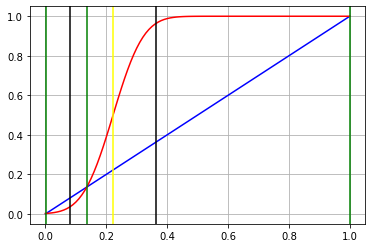

In [71]:
display_fixedpoint_plot(res[0].alpha,res[0].gamma, res[0].sigma,res[0].threshold)

In [72]:
c, objective = res[0].cost_vec, get_objective(res[0].obj_vec)

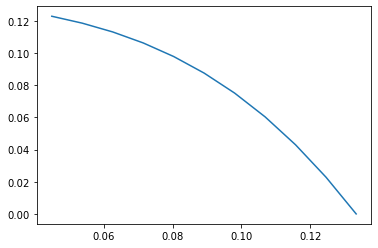

In [73]:
plt.plot(c,objective)

In [74]:
print(res[0].suff1_oneshotbest, res[0].suff2_oneshotbest)

True True


# In the following code block I will now count the number of cases where the theoretical sufficient condition1(claim 25) i.e. lambda <= 0.5 predicted one-shot optimal and, in reality, empirically we get one-shot not optimal

# suff condition 2(theorem ) is that discount factor >= 2-1/lambda then one-shot is optimal

In [75]:
def get_objective(object_list):
  return [ob.total_objective for ob in object_list]

def one_shot_inmin(paramclass_obj):
  '''
  Check if one shot is in minimum total objective
  '''
  total_obj_list = np.array(get_objective(paramclass_obj.obj_vec))
  last_index = len(paramclass_obj.obj_vec) - 1 #the index correpodning to x_2-x_1
  min_indices = np.where(total_obj_list == total_obj_list.min())[0]
  if last_index in min_indices:
    return True
  return False

def count_fraction(res):
  suff1_count = 0 #counts the number of times the theoeretical suff condition 1 is satisfied
  suff1_emp = 0 #counts the number of times suff condition 1 is satisfied and empirically also 1 shot optimal
  suff2_count = 0 #counts the number of times the theoeretical suff condition 2 is satisfied
  suff2_emp = 0 #counts the number of times suff condition 2 is satisfied and empirically also 1 shot optimal
  emp_oneshot = 0 #counts the number of times one shot is in minimum
  flag = False
  for v in res:
    if one_shot_inmin(v):
      emp_oneshot += 1
      flag = True
    if v.lamb <= 0.5:
      suff1_count += 1
      if flag:
        suff1_emp += 1
    if v.df >= 2 - 1/v.lamb:
      suff2_count += 1
      if flag:
        suff2_emp += 1
  return emp_oneshot, suff1_count, suff1_emp, suff2_count, suff2_emp    

In [76]:
emp_oneshot, suff1_count, suff1_emp, suff2_count, suff2_emp = count_fraction(res)

<ipython-input-75-e3b944a89317>:30: RuntimeWarning: divide by zero encountered in double_scalars
  if v.df >= 2 - 1/v.lamb:


In [77]:
print(emp_oneshot, suff1_count, suff1_emp, suff2_count, suff2_emp)
print(suff2_count/emp_oneshot)

21882 16830 16830 21420 21420
0.9788867562380038


# Observation1 there are no cases where sufficient theoretical conditions is satisfied and empirically oneshot is not optimal, i.e. they truly are like sufficient conditions

# Above is an great empirical result its showing that gamma >= 2-1/lambda is a pretty tight condition empirically (i.e its almost neccesary and sufficient for one-shot optimality) but not exactly 17340(from suff condition 2) vs 17645(actual total one-shot opt)

# I was initially suprised by the above so I increased the granularity i.e the number of cost interventions between [Delta,x_2-x_1] to 100 (400 MB RAM required), it still works

In [54]:
res2 = np.load("0.1grid_granu100.npy", allow_pickle=True)

In [63]:
len(res2)

30855

In [57]:
emp_oneshot, suff1_count, suff1_emp, suff2_count, suff2_emp = count_fraction(res2)

<ipython-input-48-c62b13ca75ff>:24: RuntimeWarning: divide by zero encountered in double_scalars
  if v.df >= 2 - 1/v.lamb:


In [61]:
print(emp_oneshot, suff1_count, suff1_emp, suff2_count, suff2_emp)
print(suff2_count/emp_oneshot)

21825 16830 16830 21420 21420
0.9814432989690721


In [65]:
np.save("0.1grid100granu",res2)